In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from dlpml.regression.linear_regressor import LinearRegressor

# Load example dataset

In [2]:
column_names = ["Var1", "Var2"]
data = pd.read_csv("../data/ex_linear_regression_data1.csv", header=None, names=column_names)
X_train = data.iloc[:, [0]].to_numpy() 
y_train = data.iloc[:, 1].to_numpy()

# MinMax Scale the data

In [3]:
X_train_scaled = (X_train-np.mean(X_train, axis=0) - np.min(X_train, axis=0))/(np.max(X_train, axis=0)-np.min(X_train, axis=0))
y_train_scaled = (y_train-np.mean(y_train))/np.std(y_train)

# Use delpiml LinearRegressor

In [4]:
model = model = LinearRegressor(alpha=0.01, iterations=10*1_000, lambda_=0.01)
model.fit(X_train_scaled, y_train_scaled)
y_pred = model.predict(X_train_scaled)
# Scale back the predictions
y_pred = y_pred*np.std(y_train)+np.mean(y_train)

Iteration    0: Cost     1.07   
Iteration 1000: Cost     0.28   
Iteration 2000: Cost     0.20   
Iteration 3000: Cost     0.17   
Iteration 4000: Cost     0.16   
Iteration 5000: Cost     0.15   
Iteration 6000: Cost     0.15   
Iteration 7000: Cost     0.15   
Iteration 8000: Cost     0.15   
Iteration 9000: Cost     0.15   
Iteration 9999: Cost     0.15   


# Use numpy polyfit for linear regression

In [5]:
m_numpy, b_numpy = np.polyfit(X_train_scaled.flatten(), y_train_scaled, 1)
y_pred_np = m_numpy*X_train_scaled+b_numpy
# Scale back the predictions
y_pred_np = y_pred_np*np.std(y_train)+np.mean(y_train)

# Plot the linear fits and training data

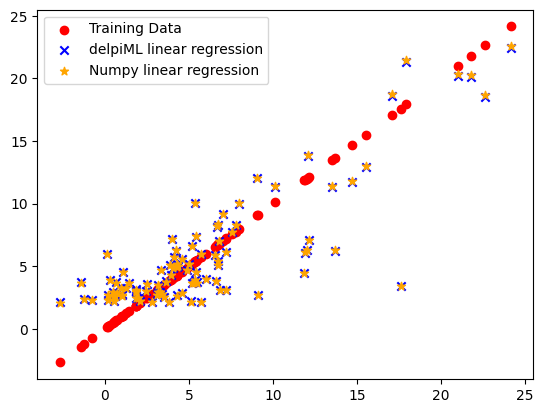

In [6]:
# Plot the linear fits and training data
sample_idx = list(np.arange(0, len(y_train), 1))
plt.scatter(y_train, y_train, marker='o', c='r', label='Training Data') 
plt.scatter(y_train, y_pred, marker='x', c = 'b', label='delpiML linear regression')
plt.scatter(y_train, y_pred_np, marker='*', c = 'orange', label='Numpy linear regression')
plt.legend()